In [0]:
from google.colab import drive
drive.mount('/content/gdrive',force_remount= True)

Mounted at /content/gdrive


In [0]:
import pandas as pd
from pandas import Series,DataFrame
%pylab inline
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")


Populating the interactive namespace from numpy and matplotlib


In [0]:

df_scraped = pd.read_csv('/content/gdrive/My Drive/Colab Notebooks/Text Analytics/Scraped_data_Luxury.csv',na_values='na')
df_scraped.head(5)


,Unnamed: 0,Username,Time,Subject
0,0,merc1,"March 25, 2002 5:54AM",I personally think that with a few tweaks the ...
1,1,fredvh,"March 25, 2002 7:06AM",I am debating a new purchase and these two are...
2,2,blueguydotcom,"March 25, 2002 5:02PM","Great handling, RWD, excellent engine and the ..."
3,3,hungrywhale,"March 25, 2002 11:04PM",And no manual tranny. That may not matter to y...
4,4,riez,"March 26, 2002 12:44AM",One beauty of BMW 3 Series is that there are s...


In [0]:
import nltk
nltk.download('stopwords')
nltk.download('punkt')
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize 
stop_words = set(stopwords.words('english')) 

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [0]:

cleaned_desc = []
cntr = 0

for i in range(len(df_scraped)):
  cntr = cntr+1
  if cntr == 500:
    print('Number of rows read until now:',i+1)
    cntr = 0

  try:
    new_words = []
    body = df_scraped['Subject'][i]
    words = word_tokenize(body)
    for w in words:
      w = w.lstrip().rstrip().lower()
      new_words.append(w)
#    words = w.lstrip().rstrip().lower()
    filtered_words = [w for w in new_words if not w in stop_words]
    filtered_words = [w for w in filtered_words if len(w) > 1]

    cleaned_desc.append(filtered_words)
  except:
    cleaned_desc.append('')



Number of rows read until now: 500
Number of rows read until now: 1000
Number of rows read until now: 1500
Number of rows read until now: 2000
Number of rows read until now: 2500
Number of rows read until now: 3000
Number of rows read until now: 3500
Number of rows read until now: 4000
Number of rows read until now: 4500
Number of rows read until now: 5000


In [0]:
import string

def cleanwords(l):
  cleaned_l = []
  for w in l:
    w = w.lstrip()
    w = w.rstrip()
    w = w.lower()
    w = w.translate(str.maketrans('','',string.punctuation))
    cleaned_l.append(w)
  return cleaned_l
  



df_scraped['Cleaned'] = pd.Series(cleaned_desc)
print(df_scraped.head(5))

df_scraped['Cleaned'] = df_scraped['Cleaned'].map(cleanwords)
print(df_scraped.head(5))

   Unnamed: 0  ...                                            Cleaned
0           0  ...  [personally, think, tweaks, c320, could, also,...
1           1  ...  [debating, new, purchase, two, top, list, pric...
2           2  ...  [great, handling, rwd, excellent, engine, best...
3           3  ...  [manual, tranny, may, matter, certainly, matte...
4           4  ...  [one, beauty, bmw, series, many, models, choos...

[5 rows x 5 columns]
   Unnamed: 0  ...                                            Cleaned
0           0  ...  [personally, think, tweaks, c320, could, also,...
1           1  ...  [debating, new, purchase, two, top, list, pric...
2           2  ...  [great, handling, rwd, excellent, engine, best...
3           3  ...  [manual, tranny, may, matter, certainly, matte...
4           4  ...  [one, beauty, bmw, series, many, models, choos...

[5 rows x 5 columns]


In [0]:
## Importing the Model-Brands file


df_models = pd.read_csv('/content/gdrive/My Drive/Colab Notebooks/Text Analytics/models (5).csv',header = None)
print(df_models.head(5))
df_models.rename(columns = {0: "Brand", 1:"Model"},inplace= True) 
print(df_models.head(5))


       0        1
0  acura  integra
1  acura   legend
2  acura    vigor
3  acura      rlx
4  acura      ilx
   Brand    Model
0  acura  integra
1  acura   legend
2  acura    vigor
3  acura      rlx
4  acura      ilx


In [0]:
## Cleaning the entries

def clean(s):
  s_clean = s.lstrip().rstrip().lower()
  s_clean = s_clean.translate(str.maketrans('','',string.punctuation))
  return s_clean

df_models['Brand'] = df_models['Brand'].map(clean)
df_models['Model'] = df_models['Model'].map(clean)
df_models.head(5)

,Brand,Model
0,acura,integra
1,acura,legend
2,acura,vigor
3,acura,rlx
4,acura,ilx


In [0]:
### Using tokenized words

unique_brands = list(set(df_models['Brand'].values.tolist()))
unique_models = list(set(df_models['Model'].values.tolist()))

def brandlist(l):
  brands = []
  for w in l:
    if w in unique_brands:
      brands.append(w)
    elif w in unique_models:
      brand = df_models[df_models['Model'] == w]['Brand'].values[0]
      brands.append(brand)
  brands = list(set(brands))
  return brands


df_scraped['Brandlist'] = df_scraped['Cleaned'].map(brandlist)


In [0]:
# ## Doing without tokenization

# ## ist from list will be mapped for toyota. famili from familiar will be mapped to Mazda

# unique_brands = list(set(df_models['Brand'].values.tolist()))
# unique_models = list(set(df_models['Model'].values.tolist()))

# def brandlist(s):
#   s =str(s)
#   brands = []
#   s=  s.lower()
#   for b in unique_brands:
#     if b in s:
#       brands.append(b)
#   for m in unique_models:
#     if m in s:
#       b = df_models[df_models['Model'] == m]['Brand'].values[0]
#       brands.append(m)
#   brands = list(set(brands))
#   return brands


# df_scraped['Brandlist'] = df_scraped['Subject'].map(brandlist)


In [0]:
df_scraped.head(15)

,Unnamed: 0,Username,Time,Subject,Cleaned,Brandlist
0,0,merc1,"March 25, 2002 5:54AM",I personally think that with a few tweaks the ...,"[personally, think, tweaks, c320, could, also,...","[cadillac, infiniti, buick, chrysler, lexus, f..."
1,1,fredvh,"March 25, 2002 7:06AM",I am debating a new purchase and these two are...,"[debating, new, purchase, two, top, list, pric...","[lexus, acura, honda]"
2,2,blueguydotcom,"March 25, 2002 5:02PM","Great handling, RWD, excellent engine and the ...","[great, handling, rwd, excellent, engine, best...",[]
3,3,hungrywhale,"March 25, 2002 11:04PM",And no manual tranny. That may not matter to y...,"[manual, tranny, may, matter, certainly, matte...",[]
4,4,riez,"March 26, 2002 12:44AM",One beauty of BMW 3 Series is that there are s...,"[one, beauty, bmw, series, many, models, choos...",[bmw]
5,5,blueguydotcom,"March 26, 2002 8:20PM","good grief, so you wait 9 months for the manua...","[good, grief, wait, months, manual, even, auto...",[bmw]
6,6,hungrywhale,"March 26, 2002 9:02PM",I'll give it a fair shot when the manual comes...,"[ll, give, fair, shot, manual, comes, m, flato...",[]
7,7,blueguydotcom,"March 26, 2002 9:45PM",I understand it's not about the speed. I reall...,"[understand, s, speed, really, nt, care, car, ...",[buick]
8,8,hungrywhale,"March 27, 2002 12:00AM",It sounds like you know why I won't even put i...,"[sounds, like, know, wo, nt, even, put, list, ...",[]
9,9,riez,"March 27, 2002 2:00AM",Is there such a thing as an automatic-only tru...,"[thing, automaticonly, true, performance, seda...",[infiniti]


Text(0.5, 1.0, 'Top 10 Brands')

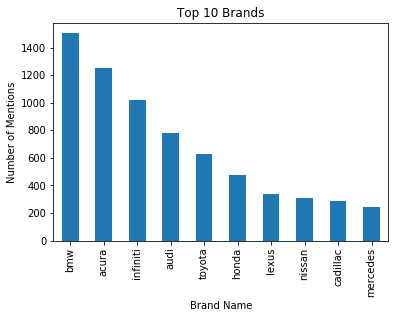

In [0]:
## Top 10 Brands by frequency of mentions

brandcounts = pd.Series(df_scraped['Brandlist'].sum()).value_counts()
brandcounts[:10].plot(kind = 'bar')
plt.xlabel('Brand Name')
plt.ylabel('Number of Mentions')
plt.title('Top 10 Brands')

In [0]:
import itertools
from itertools import product

a = brandcounts.index.tolist()
b = brandcounts.index.tolist()
combinations = pd.DataFrame(itertools.product(a, b))
combinations.columns = ["Brand1","Brand2"]
combinations.head(5)

,Brand1,Brand2
0,bmw,bmw
1,bmw,acura
2,bmw,infiniti
3,bmw,audi
4,bmw,toyota


In [0]:
## Getting the individual Brand Occurences

def getcounts(s):
  counts = brandcounts[s]
  return counts


combinations['Brand1_occurence'] = combinations['Brand1'].map(getcounts)
combinations['Brand2_occurence'] = combinations['Brand2'].map(getcounts)
combinations.head(5)

,Brand1,Brand2,Brand1_occurence,Brand2_occurence
0,bmw,bmw,1504,1504
1,bmw,acura,1504,1253
2,bmw,infiniti,1504,1022
3,bmw,audi,1504,783
4,bmw,toyota,1504,629


In [0]:
## Getting the cooccurences

def getcooccurence(s):
  brands = s.split('&')
  cntr = 0
  if brands[0] != brands[1]:
    for lst in df_scraped['Brandlist'].values.tolist():
      if brands[0] in lst and brands[1] in lst:
        cntr = cntr+1
  return cntr

combinations['Brand1&Brand2'] = combinations['Brand1']+'&'+combinations['Brand2']
combinations['Cooccurence'] = combinations['Brand1&Brand2'].map(getcooccurence)
combinations.head(5)

,Brand1,Brand2,Brand1_occurence,Brand2_occurence,Brand1&Brand2,Cooccurence
0,bmw,bmw,1504,1504,bmw&bmw,0
1,bmw,acura,1504,1253,bmw&acura,479
2,bmw,infiniti,1504,1022,bmw&infiniti,480
3,bmw,audi,1504,783,bmw&audi,435
4,bmw,toyota,1504,629,bmw&toyota,309


In [0]:
## Calculating the lift

combinations['Lift'] = (5000 * combinations['Cooccurence'])/(combinations['Brand1_occurence']*combinations['Brand2_occurence'])
combinations.head(5)



,Brand1,Brand2,Brand1_occurence,Brand2_occurence,Brand1&Brand2,Cooccurence,Lift
0,bmw,bmw,1504,1504,bmw&bmw,0,0.000000
1,bmw,acura,1504,1253,bmw&acura,479,1.270886
2,bmw,infiniti,1504,1022,bmw&infiniti,480,1.561394
3,bmw,audi,1504,783,bmw&audi,435,1.846927
4,bmw,toyota,1504,629,bmw&toyota,309,1.633165


In [0]:
## Getting in Matrix Format for Lifts

brands = list(combinations['Brand1'].unique())
df_lifts = pd.DataFrame(index=brands, columns=brands)
for i in brands:
  for j in brands:
    x = combinations[combinations['Brand1'] == i]
    value = x[x['Brand2'] == j]['Lift'].values[0]
    df_lifts[i].loc[j] = value
 
df_lifts.iloc[:10,:10]

,bmw,acura,infiniti,audi,toyota,honda,lexus,nissan,cadillac,mercedes
bmw,0,1.27089,1.56139,1.84693,1.63316,1.36033,2.0519,1.21284,1.64486,1.7519
acura,1.27089,0,1.90931,1.47793,1.52258,1.83276,1.76431,1.53378,1.55724,1.22528
infiniti,1.56139,1.90931,0,1.84948,1.65672,1.47077,2.29375,2.02388,2.06264,1.52252
audi,1.84693,1.47793,1.84948,0,1.76647,1.43978,2.25489,1.47682,2.06923,2.43769
toyota,1.63316,1.52258,1.65672,1.76647,0,2.4561,3.06643,2.51161,1.88342,1.78113
honda,1.36033,1.83276,1.47077,1.43978,2.4561,0,1.4558,3.63814,1.09112,1.60258
lexus,2.0519,1.76431,2.29375,2.25489,3.06643,1.4558,0,1.59483,2.6365,4.18632
nissan,1.21284,1.53378,2.02388,1.47682,2.51161,3.63814,1.59483,0,1.19171,1.55433
cadillac,1.64486,1.55724,2.06264,2.06923,1.88342,1.09112,2.6365,1.19171,0,3.253
mercedes,1.7519,1.22528,1.52252,2.43769,1.78113,1.60258,4.18632,1.55433,3.253,0


In [0]:
## Getting in Matrix Format for MDS

brands = list(combinations['Brand1'].unique())
df = pd.DataFrame(index=brands, columns=brands)
for i in brands:
  for j in brands:
    x = combinations[combinations['Brand1'] == i]
    value = 1/(x[x['Brand2'] == j]['Lift'].values[0])
    if value == float("inf"):
      value = 0
    elif isnan(value):
      value = 0
    df[i].loc[j] = value
 
df.iloc[:10,:10]

,bmw,acura,infiniti,audi,toyota,honda,lexus,nissan,cadillac,mercedes
bmw,0,0.786853,0.640453,0.54144,0.612308,0.735118,0.487354,0.824514,0.607955,0.570809
acura,0.786853,0,0.523749,0.67662,0.656781,0.545625,0.566793,0.651985,0.642162,0.816143
infiniti,0.640453,0.523749,0,0.540693,0.603604,0.679914,0.435967,0.494101,0.484817,0.656805
audi,0.54144,0.67662,0.540693,0,0.5661,0.69455,0.443481,0.67713,0.483271,0.410224
toyota,0.612308,0.656781,0.603604,0.5661,0,0.40715,0.326112,0.398151,0.53095,0.561441
honda,0.735118,0.545625,0.679914,0.69455,0.40715,0,0.686906,0.274865,0.916487,0.623995
lexus,0.487354,0.566793,0.435967,0.443481,0.326112,0.686906,0,0.627024,0.37929,0.238874
nissan,0.824514,0.651985,0.494101,0.67713,0.398151,0.274865,0.627024,0,0.839133,0.643365
cadillac,0.607955,0.642162,0.484817,0.483271,0.53095,0.916487,0.37929,0.839133,0,0.307409
mercedes,0.570809,0.816143,0.656805,0.410224,0.561441,0.623995,0.238874,0.643365,0.307409,0


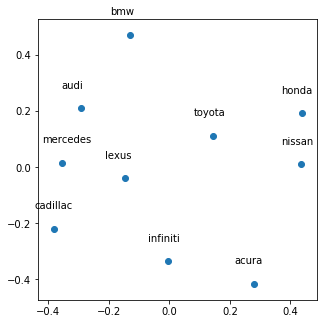

In [0]:
#https://datascience.stackexchange.com/questions/49316/multidimensional-scaling-producing-different-results-for-different-seeds

from sklearn import manifold

df_new = df.iloc[:10,:10]

#df_new = df
mds = manifold.MDS(n_components=2, dissimilarity="precomputed", random_state=6)
results = mds.fit(df_new.values)

brands = df_new.columns
coords = results.embedding_

fig = plt.figure(figsize=(5,5))

plt.subplots_adjust(bottom = 0.1)
plt.scatter(coords[:, 0], coords[:, 1])

for label, x, y in zip(brands, coords[:, 0], coords[:, 1]):
    plt.annotate(
        label,
        xy = (x, y), 
        xytext = (-20, 20),
        textcoords = 'offset points'
    )
plt.show()

Points to notice from the MDS above:

  1) Nissan, Honda and Toyota are comparable brands
  
  2) Mercedes, Audi and Lexus are comparable brands

  3) Cadillac is close to Mercedes and no other brands

  4) BMW isn't talked with any of the other brands. It suggests that people who own a BMW tend to stick with a BMW

  5) Infiniti and Acura are in a cluster of their own 

In [0]:
#combinations.to_csv('/content/gdrive/My Drive/Colab Notebooks/Text Analytics/Combinations.csv')

##  **Looking at the attributes**

In [0]:
df_scraped.head(5)

,Unnamed: 0,Username,Time,Subject,Cleaned,Brandlist
0,0,merc1,"March 25, 2002 5:54AM",I personally think that with a few tweaks the ...,"[personally, think, tweaks, c320, could, also,...","[cadillac, infiniti, buick, chrysler, lexus, f..."
1,1,fredvh,"March 25, 2002 7:06AM",I am debating a new purchase and these two are...,"[debating, new, purchase, two, top, list, pric...","[lexus, acura, honda]"
2,2,blueguydotcom,"March 25, 2002 5:02PM","Great handling, RWD, excellent engine and the ...","[great, handling, rwd, excellent, engine, best...",[]
3,3,hungrywhale,"March 25, 2002 11:04PM",And no manual tranny. That may not matter to y...,"[manual, tranny, may, matter, certainly, matte...",[]
4,4,riez,"March 26, 2002 12:44AM",One beauty of BMW 3 Series is that there are s...,"[one, beauty, bmw, series, many, models, choos...",[bmw]


In [0]:
## Getting the top most frequent words

wordcounts = pd.Series(df_scraped['Cleaned'].sum()).value_counts()
wordfrequency = pd.DataFrame(wordcounts)
wordfrequency.reset_index(inplace= True)
wordfrequency.columns = ["Words","Count"]
wordfrequency.head(5)


,Words,Count
0,,7574
1,car,3938
2,s,3902
3,nt,3395
4,cars,1960


In [0]:
#wordfrequency.to_csv('/content/gdrive/My Drive/Colab Notebooks/Text Analytics/WordFrequencies.csv')

Looked at the frequenct words in the comments of users and grouped these words into five major attributes.

1) **Performance**: If the user talks about the performance of the car. We grouped words like: Engine, Power, Torque, RPM, HorsePower etc

2) **Features and Styling**: If the user is talking about the internal or external features about the car then they are grouped together. It contains words like: Leather, Design, Interior, Looks, Sporty etc

3) **Feel and Comfort**: If the user describes how he feels while driving the car we group them under this category. It has words like Luxury, Handling, Fun, Reliable, Quality, Experience etc

4) **Economic**: If the user talks about the price or mileage details of the cars they come under this category. It has words like Value, Money, Deal, Mileage, MPG etc

5) **Dealership Services**: If the user talks about thier experience with the dealership or the sales representatives we include them here. It has words like Dealer, Service, Warranty, Support, Salesman etc

In [0]:
## Importing the Words - Attributes file

df_attributes = pd.read_csv('/content/gdrive/My Drive/Colab Notebooks/Text Analytics/Attributes Lookup.csv')
print(df_attributes.head(5))


         Words        Attributes
0  performance       Performance
1       luxury  Feel and Comfort
2       engine       Performance
3        price          Economic
4          buy          Economic


In [0]:
### Getting the list of attributes and features discussed in each comment

words_list = list(df_attributes['Words'].values)

def getwordlist(l):
  words = []
  for w in l:
    if w in words_list:
      words.append(w)
  return list(set(words))



df_scraped['WordsList'] = df_scraped['Cleaned'].map(getwordlist)

df_scraped.head(5)

,Unnamed: 0,Username,Time,Subject,Cleaned,Brandlist,WordsList
0,0,merc1,"March 25, 2002 5:54AM",I personally think that with a few tweaks the ...,"[personally, think, tweaks, c320, could, also,...","[cadillac, infiniti, buick, chrysler, lexus, f...","[look, body, transmission, power, engine, look..."
1,1,fredvh,"March 25, 2002 7:06AM",I am debating a new purchase and these two are...,"[debating, new, purchase, two, top, list, pric...","[lexus, acura, honda]","[worth, price, quality, service, prices]"
2,2,blueguydotcom,"March 25, 2002 5:02PM","Great handling, RWD, excellent engine and the ...","[great, handling, rwd, excellent, engine, best...",[],"[warranty, engine, handling]"
3,3,hungrywhale,"March 25, 2002 11:04PM",And no manual tranny. That may not matter to y...,"[manual, tranny, may, matter, certainly, matte...",[],[manual]
4,4,riez,"March 26, 2002 12:44AM",One beauty of BMW 3 Series is that there are s...,"[one, beauty, bmw, series, many, models, choos...",[bmw],"[manual, engine, transmission, performance]"


In [0]:
## Getting the number of times the features were mentioned throughout
featurecounts = pd.Series(pd.Series(df_scraped['WordsList'].sum()).value_counts())
featurecounts

performance    663
luxury         446
engine         435
price          428
buy            424
              ... 
dealerships     12
salesperson      8
showroom         8
salesguy         4
salesmen         3
Length: 148, dtype: int64

In [0]:
## Getting combinations of brands and Features. Only the TOP 5 brands are considered here

import itertools
from itertools import product

a = brandcounts[:5].index.tolist()
b = df_attributes['Words'].unique().tolist()
brand_feature_comb = pd.DataFrame(itertools.product(a, b))
brand_feature_comb.columns = ["Brand","Words"]
brand_feature_comb.head(5)

,Brand,Words
0,bmw,performance
1,bmw,luxury
2,bmw,engine
3,bmw,price
4,bmw,buy


In [0]:
## Getting the Brand and Feature occurences

def brandcounter(s):
  counts = brandcounts[s]
  return counts

def featcounter(s):
  counts = featurecounts[s]
  return counts

brand_feature_comb['Brand_occurence'] = brand_feature_comb['Brand'].map(brandcounter)
brand_feature_comb['Feature_occurence'] = brand_feature_comb['Words'].map(featcounter)
brand_feature_comb.head(5)

,Brand,Words,Brand_occurence,Feature_occurence
0,bmw,performance,1504,663
1,bmw,luxury,1504,446
2,bmw,engine,1504,435
3,bmw,price,1504,428
4,bmw,buy,1504,424


In [0]:
## Getting the brand and feature cooccurences
brand_byuser = df_scraped['Brandlist'].values.tolist()
feat_byuser = df_scraped['WordsList'].values.tolist()

def getcooccurence(s):
  brand = s.split('&')[0]
  feature = s.split('&')[1]
  cntr = 0
  for i in range(5000):
    if brand in brand_byuser[i] and feature in feat_byuser[i]:
      cntr+=1
  return cntr

brand_feature_comb['Brand&Feat'] = brand_feature_comb['Brand']+'&'+brand_feature_comb['Words']
brand_feature_comb['Cooccurence'] = brand_feature_comb['Brand&Feat'].map(getcooccurence)
brand_feature_comb.head(5)

,Brand,Words,Brand_occurence,Feature_occurence,Brand&Feat,Cooccurence
0,bmw,performance,1504,663,bmw&performance,291
1,bmw,luxury,1504,446,bmw&luxury,179
2,bmw,engine,1504,435,bmw&engine,198
3,bmw,price,1504,428,bmw&price,208
4,bmw,buy,1504,424,bmw&buy,189


In [0]:
## Calculating the lift

brand_feature_comb['Lift'] = (5000 * brand_feature_comb['Cooccurence'])/(brand_feature_comb['Brand_occurence']*brand_feature_comb['Feature_occurence'])
brand_feature_comb.head(5)



,Brand,Words,Brand_occurence,Feature_occurence,Brand&Feat,Cooccurence,Lift
0,bmw,performance,1504,663,bmw&performance,291,1.459156
1,bmw,luxury,1504,446,bmw&luxury,179,1.334260
2,bmw,engine,1504,435,bmw&engine,198,1.513206
3,bmw,price,1504,428,bmw&price,208,1.615629
4,bmw,buy,1504,424,bmw&buy,189,1.481897


In [0]:
## We need to shortlist the features which has lift > 1 for all of the top 5 brands

## Here we are getting all combinations of brand and feature which has lift > 1 and seeing for each feature how many brands it has a lift > 1
feat_brand_good_lifts = brand_feature_comb[brand_feature_comb['Lift'] > 1]['Words'].value_counts()

## Shortlisting the features which has lift > 1 for all 5 brands

shortlisted_features = list(feat_brand_good_lifts[feat_brand_good_lifts == 5].index)
len(shortlisted_features)

102

### **Grouping these shortlisted features into 5 attributes and looking at assosciations by brand**

In [0]:
shortlisted_features.remove('like')
shortlisted_features.remove('drive')
shortlisted_features.remove('driving')
shortlisted_features.remove('make')
shortlisted_features.remove('good')
shortlisted_features.remove('great')
shortlisted_features.remove('love')
shortlisted_features.remove('brand')
shortlisted_features.remove('looked')
shortlisted_features.remove('rwd')
shortlisted_features.remove('fwd')
shortlisted_features.remove('awd')


ValueError: ignored

In [0]:
len(shortlisted_features)

102

In [0]:
### Getting the list of attributes from the shortlisted features

words_list = shortlisted_features

def getlist(l):
  attributes = []
  for w in l:
    if w in words_list:
      att = df_attributes[df_attributes['Words'] == w]['Attributes'].values[0]
      attributes.append(att)
  return list(set(attributes))


df_scraped['AttributesList'] = df_scraped['Cleaned'].map(getlist)

df_scraped.head(5)

,Unnamed: 0,Username,Time,Subject,Cleaned,Brandlist,WordsList,AttributesList
0,0,merc1,"March 25, 2002 5:54AM",I personally think that with a few tweaks the ...,"[personally, think, tweaks, c320, could, also,...","[cadillac, infiniti, buick, chrysler, lexus, f...","[look, body, transmission, power, engine, look...","[Economic, Feel and Comfort, Features and Styl..."
1,1,fredvh,"March 25, 2002 7:06AM",I am debating a new purchase and these two are...,"[debating, new, purchase, two, top, list, pric...","[lexus, acura, honda]","[worth, price, quality, service, prices]","[Economic, Feel and Comfort]"
2,2,blueguydotcom,"March 25, 2002 5:02PM","Great handling, RWD, excellent engine and the ...","[great, handling, rwd, excellent, engine, best...",[],"[warranty, engine, handling]","[Performance, Feel and Comfort]"
3,3,hungrywhale,"March 25, 2002 11:04PM",And no manual tranny. That may not matter to y...,"[manual, tranny, may, matter, certainly, matte...",[],[manual],[]
4,4,riez,"March 26, 2002 12:44AM",One beauty of BMW 3 Series is that there are s...,"[one, beauty, bmw, series, many, models, choos...",[bmw],"[manual, engine, transmission, performance]",[Performance]


In [0]:
## Getting the number of times the attributes were mentioned throughout
attcounts = pd.Series(pd.Series(df_scraped['AttributesList'].sum()).value_counts())
attcounts

Feel and Comfort        2422
Features and Styling    1913
Performance             1901
Economic                1855
Dealership Services      859
dtype: int64

In [0]:
## Getting combinations of brands and attributes

import itertools
from itertools import product

a = brandcounts[:5].index.tolist()
b = df_attributes['Attributes'].unique().tolist()
brand_att_comb = pd.DataFrame(itertools.product(a, b))
brand_att_comb.columns = ["Brand","Attributes"]
brand_att_comb.head(5)

,Brand,Attributes
0,bmw,Performance
1,bmw,Feel and Comfort
2,bmw,Economic
3,bmw,Features and Styling
4,bmw,Dealership Services


In [0]:
## Getting the Brand and Attribute occurences

def brandcounter(s):
  counts = brandcounts[s]
  return counts

def attcounter(s):
  counts = attcounts[s]
  return counts

brand_att_comb['Brand_occurence'] = brand_att_comb['Brand'].map(brandcounter)
brand_att_comb['Attribute_occurence'] = brand_att_comb['Attributes'].map(attcounter)
brand_att_comb.head(5)

,Brand,Attributes,Brand_occurence,Attribute_occurence
0,bmw,Performance,1504,1901
1,bmw,Feel and Comfort,1504,2422
2,bmw,Economic,1504,1855
3,bmw,Features and Styling,1504,1913
4,bmw,Dealership Services,1504,859


In [0]:
## Getting the brand and attribute cooccurences
brand_byuser = df_scraped['Brandlist'].values.tolist()
att_byuser = df_scraped['AttributesList'].values.tolist()

def getcooccurence(s):
  brand = s.split('&')[0]
  attribute = s.split('&')[1]
  cntr = 0
  for i in range(5000):
    if brand in brand_byuser[i] and attribute in att_byuser[i]:
      cntr+=1
  return cntr

brand_att_comb['Brand&Att'] = brand_att_comb['Brand']+'&'+brand_att_comb['Attributes']
brand_att_comb['Cooccurence'] = brand_att_comb['Brand&Att'].map(getcooccurence)
brand_att_comb.head(5)

,Brand,Attributes,Brand_occurence,Attribute_occurence,Brand&Att,Cooccurence
0,bmw,Performance,1504,1901,bmw&Performance,757
1,bmw,Feel and Comfort,1504,2422,bmw&Feel and Comfort,932
2,bmw,Economic,1504,1855,bmw&Economic,796
3,bmw,Features and Styling,1504,1913,bmw&Features and Styling,685
4,bmw,Dealership Services,1504,859,bmw&Dealership Services,350


In [0]:
## Calculating the lift

brand_att_comb['Lift'] = (5000 * brand_att_comb['Cooccurence'])/(brand_att_comb['Brand_occurence']*brand_att_comb['Attribute_occurence'])
brand_att_comb.head(5)



,Brand,Attributes,Brand_occurence,Attribute_occurence,Brand&Att,Cooccurence,Lift
0,bmw,Performance,1504,1901,bmw&Performance,757,1.323841
1,bmw,Feel and Comfort,1504,2422,bmw&Feel and Comfort,932,1.279275
2,bmw,Economic,1504,1855,bmw&Economic,796,1.426564
3,bmw,Features and Styling,1504,1913,bmw&Features and Styling,685,1.190413
4,bmw,Dealership Services,1504,859,bmw&Dealership Services,350,1.354556


In [0]:
## Getting in Matrix Format for Lifts

brands = list(brand_att_comb['Brand'].unique())
atts = list(brand_att_comb['Attributes'].unique())

df_associations = pd.DataFrame(index=brands, columns=atts)
for i in brands:
  for j in atts:
    x = brand_att_comb[brand_att_comb['Brand'] == i]
    value = x[x['Attributes'] == j]['Lift'].values[0]
    df_associations[j].loc[i] = value
 
df_associations

,Performance,Feel and Comfort,Economic,Features and Styling,Dealership Services
bmw,1.32384,1.27928,1.42656,1.19041,1.35456
acura,1.30145,1.2571,1.36169,1.28495,1.32395
infiniti,1.33569,1.30692,1.43738,1.37846,1.4979
audi,1.40075,1.36309,1.53532,1.39531,1.3158
toyota,1.46354,1.45395,1.5684,1.38372,1.32331


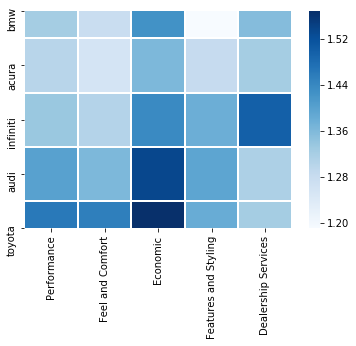

In [0]:
## Getting the heatmaps

df_heatmap = df_associations
df_heatmap = df_heatmap.apply(pd.to_numeric, errors='coerce')
sns.heatmap(df_heatmap, cmap='Blues',linewidths=1, linecolor='white')


### Observations from Heatmap

Nissan,Mercedes and Lexus have good dealerships

Audi, Honda, Toyota and Lexus are considered economic

Toyota is considered to have better performance than others

It's ironic that this being a luxury forum, the assosciations with 'Feel and Comfort' are low.

## Most Aspirational Brand

In [0]:
aspirational_words = ['would','want','buy','next','buying','wanted','hope','willing','wants','hopefully','buys']

In [0]:
## Checking if any aspirational word is present in that comment

def aspriational(l):
  for w in l:
    if w in aspirational_words:
      return 1
  return 0


df_scraped['AspirationalFlag'] = df_scraped['Cleaned'].map(aspriational)
df_scraped.head(5)

,Unnamed: 0,Username,Time,Subject,Cleaned,Brandlist,WordsList,AttributesList,AspirationalFlag
0,0,merc1,"March 25, 2002 5:54AM",I personally think that with a few tweaks the ...,"[personally, think, tweaks, c320, could, also,...","[cadillac, infiniti, buick, chrysler, lexus, f...","[look, body, transmission, power, engine, look...","[Economic, Feel and Comfort, Features and Styl...",1
1,1,fredvh,"March 25, 2002 7:06AM",I am debating a new purchase and these two are...,"[debating, new, purchase, two, top, list, pric...","[lexus, acura, honda]","[worth, price, quality, service, prices]","[Economic, Feel and Comfort]",1
2,2,blueguydotcom,"March 25, 2002 5:02PM","Great handling, RWD, excellent engine and the ...","[great, handling, rwd, excellent, engine, best...",[],"[warranty, engine, handling]","[Performance, Feel and Comfort]",0
3,3,hungrywhale,"March 25, 2002 11:04PM",And no manual tranny. That may not matter to y...,"[manual, tranny, may, matter, certainly, matte...",[],[manual],[],0
4,4,riez,"March 26, 2002 12:44AM",One beauty of BMW 3 Series is that there are s...,"[one, beauty, bmw, series, many, models, choos...",[bmw],"[manual, engine, transmission, performance]",[Performance],0


In [0]:

def aspcount(b):
  cntr = 0
  for i in range(5000):
    if (b in df_scraped['Brandlist'][i]) and (df_scraped['AspirationalFlag'][i]==1):
      cntr = cntr+1
  return cntr




top_brands = pd.DataFrame(brandcounts[:10])
top_brands = top_brands.reset_index()
top_brands.rename(columns = {'index': "Brand",0:"Counts"},inplace= True) 
top_brands['AspirationalCounts'] = top_brands['Brand'].map(aspcount)
top_brands['% of times mentioned'] = top_brands['AspirationalCounts']*100.0/top_brands['Counts']
top_brands


,Brand,Counts,AspirationalCounts,% of times mentioned
0,bmw,1504,777,51.662234
1,acura,1253,598,47.725459
2,infiniti,1022,540,52.837573
3,audi,783,417,53.256705
4,toyota,629,319,50.715421
5,honda,479,260,54.279749
6,lexus,337,188,55.786350
7,nissan,307,160,52.117264
8,cadillac,287,152,52.961672
9,mercedes,241,129,53.526971


We see that more people are looking to buy lexus
